<h1>Web Scraping IMDb's Top 1000 Movies</h1>

In this notebook, we will explore web scraping techniques to gather data from IMDb's website, focusing on the top 1000 movies as rated by users. We will use the BeautifulSoup library in Python to extract movie details such as the movie name, certificate rating, duration, genre, IMDb rating, metascore, director, stars, votes, gross earnings, and a brief plot summary.

The goal of this project is to collect valuable data from IMDb, which can be used for various analyses, recommendations, and insights. We will perform web scraping on multiple pages to gather comprehensive information about these top-rated movies. The final dataset will be used for further analysis and visualization.

Let's get started with the web scraping process and data extraction.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h2>Installing Required Python Packages</h2>

In this cell, we install two essential Python packages:

- **Requests**: This library allows us to make HTTP requests to web pages, which is crucial for fetching web content.

- **Beautiful Soup (beautifulsoup4)**: This is a powerful library for web scraping. It helps parse and extract data from HTML and XML documents.

We need these packages to scrape data from a website successfully. If you haven't installed these packages yet, you can run the following commands:


In [2]:
!pip install requests
!pip install beautifulsoup4

### Importing Essential Python Libraries

In this cell, we import several Python libraries that are essential for various tasks in data analysis, visualization, and web scraping:

- **NumPy (np)**: NumPy is a fundamental library for numerical and mathematical operations. It provides support for working with arrays and matrices.

- **Pandas (pd)**: Pandas is a powerful library for data manipulation and analysis. It introduces data structures like DataFrames for easy handling of tabular data.

- **Matplotlib (plt)**: Matplotlib is a popular library for creating static, animated, or interactive visualizations in Python. It's commonly used for plotting charts and graphs.

- **Seaborn (sns)**: Seaborn is a data visualization library that works in conjunction with Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

- **Requests**: The 'requests' library enables making HTTP requests to fetch data from websites. It's essential for web scraping.

- **Beautiful Soup (from bs4 import BeautifulSoup)**: Beautiful Soup is a library for web scraping. It allows you to parse and navigate HTML and XML documents, making it easier to extract data from web pages.

These libraries are crucial for our project, where we'll scrape data from a website, analyze it, and create visualizations to gain insights from the data.
Providing explanations for library imports helps others understand the purpose and use of each library in your notebook.







In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

### Web Scraping IMDb's Top 1000 Movies

In this cell, we perform the initial steps of web scraping IMDb's top 1000 movies:

1. **URL Generation**: We generate a list of URLs to access different pages of IMDb's top 1000 movies. IMDb lists movies in groups of 100, and we loop through 10 pages, each containing 100 movies. We use a base URL with parameters to specify the sorting and starting point.

2. **HTTP Requests**: For each URL, we send an HTTP GET request using the 'requests' library to fetch the webpage's HTML content.

3. **Parsing with BeautifulSoup**: We use BeautifulSoup to parse the HTML content of each page. BeautifulSoup allows us to navigate and extract specific information from the web pages.


In [4]:
url = []   # Initialize an empty list to store URLs
page = []  # Initialize an empty list to store webpage content
soup = []  # Initialize an empty list to store BeautifulSoup objects

for i in range(0, 10):
    # Generate IMDb URLs for the top 1000 movies, adjusting the 'start' parameter
    url.append(f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={100 * i + 1}&ref_=adv_nxt")
    
    # Send an HTTP GET request to fetch the webpage content
    page.append(requests.get(url[i]))
    
    # Parse the webpage content using BeautifulSoup with the "html.parser" parser
    soup.append(BeautifulSoup(page[i].content, "html.parser"))

### Creating an Empty DataFrame for IMDb's Top 1000 Movies

In this cell, we initialize an empty DataFrame, `imdb_top1000`, to store the scraped movie data. The DataFrame is structured with the following columns:

- **Movie Name**: The name of the movie.
- **Certificate**: The age certificate or rating of the movie.
- **Duration**: The duration of the movie.
- **Genre**: The genre(s) of the movie.
- **IMDb Rating**: The IMDb rating of the movie.
- **Metascore**: The Metascore rating of the movie (if available).
- **Director**: The director(s) of the movie.
- **Stars**: The main cast or stars of the movie.
- **Votes**: The number of votes/ratings the movie has received on IMDb.
- **Grossed**: The total gross earnings of the movie (if available).
- **Plot**: A brief plot summary of the movie.

In [5]:
imdb_top1000 = pd.DataFrame(columns=['Movie Name', 'Certificate', 'Duration', 'Genre', 'IMDb Rating', 'Metascore', 'Director', 'Stars', 'Votes', 'Grossed', 'Plot'])


### Scraping and Storing IMDb Top 1000 Movie Data

In this cell, we scrape movie data from IMDb's list of the top 1000 movies. The code performs the following steps:

1. An empty list named `movie_data` is created to accumulate movie data.

2. A loop is used to iterate over the first 10 pages of IMDb's top 1000 movies. For each page, the code performs the following actions:

   - The BeautifulSoup object `soup` for the respective page is used to select all movie containers with the class "lister-item-content."

   - For each movie container, the code extracts various details such as the movie name, certificate, duration, genre, IMDb rating, Metascore (if available), director, cast (stars), number of votes, gross earnings, and plot summary.

   - The extracted information for each movie is organized into a dictionary named `moviedict`, where keys represent column names (e.g., 'Movie Name', 'Certificate') and values contain the scraped data.

   - The `moviedict` for each movie is appended to the `movie_data` list.

3. Once data from all 10 pages is collected and organized in the `movie_data` list, a new DataFrame named `imdb_top1000` is created. This DataFrame is populated with the scraped movie data, with each row representing a different movie, and each column corresponding to a specific attribute.

4. Finally, the `imdb_top1000` DataFrame is displayed, allowing you to inspect the first few rows of the scraped data.

This code efficiently scrapes and structures movie data from IMDb, providing a foundation for further analysis or visualization of the top 1000 movies.

In [6]:
# Create an empty list to accumulate movie data
movie_data = []

# Iterate through the first 10 pages (each containing 100 movies) of IMDb's top 1000 movies
for i in range(0, 10):
    # Create a list of IMDb URLs for each page
    url.append(f"https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={100 * i + 1}&ref_=adv_nxt")
    
    # Send an HTTP GET request to the IMDb URL and store the page content
    page.append(requests.get(url[i]))
    
    # Parse the HTML content of the page using BeautifulSoup
    soup.append(BeautifulSoup(page[i].content, "html.parser"))

# Create an empty DataFrame to store the movie data with predefined column names
imdb_top1000 = pd.DataFrame(columns=['Movie Name', 'Certificate', 'Duration', 'Genre', 'IMDb Rating', 'Metascore', 'Director', 'Stars', 'Votes', 'Grossed', 'Plot'])

# Loop through the first 10 pages of movie data
for i in range(0, 10):
    # Find all movie containers on the page with class "lister-item-content"
    movielist = soup[i].select(".lister-item-content")

    # Iterate over each movie container and extract relevant information
    for movie in movielist:
        # Extract the movie name from an anchor tag within an h3 element
        moviename = movie.find("h3").find("a").text

        # Extract the certificate if available, else set it to None
        certificate_tag = movie.find("span", class_='certificate')
        certificate = certificate_tag.text if certificate_tag else None

        # Extract the movie's duration
        duration = movie.find("span", class_='runtime').text

        # Extract the movie's genre and strip any extra whitespace
        genre = movie.find("span", class_='genre').text.strip()

        # Extract the IMDb rating from a strong element
        imdbrating = movie.find('strong').text

        # Extract the Metascore if available, else set it to None
        metascore_tag = movie.find("div", class_='inline-block ratings-metascore')
        metascore = metascore_tag.text.strip().split()[0] if metascore_tag else None

        # Extract the director's name from an anchor tag
        director = movie.find("p", class_="").find("a", href=True).text

        # Extract the names of the movie's stars
        stars_tags = movie.find("p", class_="").find_all("a", href=True)
        stars = [a.text for a in stars_tags[1:]]

        # Extract the number of votes
        votes = movie.find("span", {"name": "nv"})["data-value"]

        # Extract the grossed earnings if available, else set it to None
        grossed_tag = movie.find("span", {"name": "nv"})
        grossed = grossed_tag["data-value"] if grossed_tag else None

        # Extract the movie's plot summary from the next paragraph
        plot = movie.find("p", class_="text-muted").find_next("p").text.strip()

        # Create a dictionary for the current movie's data
        moviedict = {
            'Movie Name': moviename,
            'Certificate': certificate,
            'Duration': duration,
            'Genre': genre,
            'IMDb Rating': imdbrating,
            'Metascore': metascore,
            'Director': director,
            'Stars': stars,
            'Votes': votes,
            'Grossed': grossed,
            'Plot': plot
        }

        # Append the current movie's dictionary to the list of movie data
        movie_data.append(moviedict)

# Create a DataFrame from the list of movie data
imdb_top1000 = pd.DataFrame(movie_data)


In [7]:
imdb_top1000=imdb_top1000.rename(columns={'Grossed':'Grossed in $'})
imdb_top1000

,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,The Shawshank Redemption,R,142 min,Drama,9.3,82,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",2807416,2807416,"Over the course of several years, two convicts..."
1,The Godfather,R,175 min,"Crime, Drama",9.2,100,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K...",1956381,1956381,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152 min,"Action, Crime, Drama",9.0,84,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ...",2789160,2789160,When the menace known as the Joker wreaks havo...
3,Schindler's List,R,195 min,"Biography, Drama, History",9.0,95,Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car...",1411332,1411332,"In German-occupied Poland during World War II,..."
4,The Lord of the Rings: The Return of the King,PG-13,201 min,"Action, Adventure, Drama",9.0,94,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O...",1921772,1921772,Gandalf and Aragorn lead the World of Men agai...
...,...,...,...,...,...,...,...,...,...,...,...
995,Philomena,PG-13,98 min,"Biography, Comedy, Drama",7.6,77,Stephen Frears,"[Judi Dench, Steve Coogan, Sophie Kennedy Clar...",102737,102737,A world-weary political journalist picks up th...
996,Control,R,122 min,"Biography, Drama, Music",7.6,78,Anton Corbijn,"[Sam Riley, Samantha Morton, Craig Parkinson, ...",67636,67636,"A profile of Ian Curtis, the enigmatic singer ..."
997,A Very Long Engagement,R,133 min,"Drama, Mystery, Romance",7.6,76,Jean-Pierre Jeunet,"[Audrey Tautou, Gaspard Ulliel, Jodie Foster, ...",75253,75253,Tells the story of a young woman's relentless ...
998,Shine,PG-13,105 min,"Biography, Drama, Music",7.6,87,Scott Hicks,"[Geoffrey Rush, Armin Mueller-Stahl, Justin Br...",55864,55864,"Pianist David Helfgott, driven by his father a..."


### Saving Movie Data to a CSV File

We have successfully scraped the top 1000 movies from IMDb and stored their information in a DataFrame called `imdb_top1000`. To make this data more accessible for further analysis or sharing, we will save it to a CSV (Comma-Separated Values) file.

In [8]:
imdb_top1000.to_csv('IMDb top 1000 movies.csv') 

### Exploratory Data Analysis (EDA) on IMDb Top 1000 Movies

Now that we have successfully scraped and collected data for the top 1000 movies from IMDb, it's time to dive into the world of exploratory data analysis (EDA). EDA is a crucial step in the data analysis process that helps us understand our data, identify patterns, and gain insights.

In this EDA, we'll be exploring various aspects of the movie data, including:

1. **Summary Statistics**: We'll begin by computing summary statistics for key numerical columns, such as IMDb ratings, Metascores, and more. These statistics will give us an overview of the data's central tendencies.

2. **Data Visualization**: Visualization is a powerful tool for understanding data. We'll create visualizations, such as histograms, bar plots, and scatter plots, to explore relationships and trends within the data. For example, we can visualize the distribution of IMDb ratings or explore the relationship between IMDb ratings and Metascores.

3. **Genre Analysis**: We'll analyze the distribution of movie genres in the top 1000 movies. Which genres are the most popular among the top-rated films, and how do they vary over time?

4. **Director and Actor Insights**: Who are the most prolific directors and actors in this list? We'll uncover insights into which directors and actors are associated with the highest-rated movies.

5. **Movie Duration**: What is the distribution of movie durations among the top-rated films? Are there any patterns in the duration of highly-rated movies?

6. **User Votes and Gross Earnings**: We'll explore the relationship between user votes and gross earnings for these movies. Do highly-rated movies tend to earn more?

7. **Top-Rated Movies**: Finally, we'll reveal the top-rated movies from the list and provide some information about them.

Our EDA will aim to answer these questions and more. Through this process, we hope to gain a deeper understanding of what makes a movie stand out among IMDb's top 1000 and to uncover interesting insights within the dataset.


In [9]:
#checking for null values
imdb_top1000.isnull().sum()

Movie Name        0
Certificate      15
Duration          0
Genre             0
IMDb Rating       0
Metascore       155
Director          0
Stars             0
Votes             0
Grossed in $      0
Plot              0
dtype: int64

## Checking and Handling Null Values

Let's start by checking for missing values in our dataset. The following table shows the number of missing values in each column:

| Column Name   | Missing Values |
|---------------|-----------------|
| Movie Name    | 0               |
| Certificate   | 105             |
| Duration      | 0               |
| Genre         | 0               |
| IMDb Rating   | 0               |
| Metascore     | 155             |
| Director      | 0               |
| Stars         | 0               |
| Votes         | 0               |
| Grossed in $  | 0               |
| Plot          | 0               |

We can see that the columns "Certificate" and "Metascore" have missing values.

### Handling Missing Values

- **Certificate**: The "Certificate" column represents the movie's certification rating. Missing values might indicate that this information was not available. We can choose to leave these values as is or fill them with a default value (e.g., "Not Rated").

- **Metascore**: The "Metascore" column represents the movie's Metascore rating. Missing values might indicate that this information was not available on IMDb. We can choose to leave these values as is or fill them with a placeholder (e.g., -1) to distinguish them from valid values.

The decision on handling missing values should depend on the analysis we plan to perform. For the purpose of our analysis, we'll proceed with the missing values as is since they are not crucial for our primary focus on IMDb ratings, genres, directors, and other features.



In [10]:
#let's check for the info() about the dataframe
imdb_top1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    1000 non-null   object
 1   Certificate   985 non-null    object
 2   Duration      1000 non-null   object
 3   Genre         1000 non-null   object
 4   IMDb Rating   1000 non-null   object
 5   Metascore     845 non-null    object
 6   Director      1000 non-null   object
 7   Stars         1000 non-null   object
 8   Votes         1000 non-null   object
 9   Grossed in $  1000 non-null   object
 10  Plot          1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


## Data Types and Memory Usage

The `info()` function provides an overview of the data types and memory usage of the IMDb top 1000 movies dataset. Here's what we can infer from the output:

- The dataset contains 1,000 entries, indexed from 0 to 999.
- There are a total of 11 columns in the dataset.
- All columns have data type 'object', which typically represents text data.

Here's a brief description of each column:
1. **Movie Name**: The name of the movie.
2. **Certificate**: The certification rating of the movie.
3. **Duration**: The duration of the movie.
4. **Genre**: The genre(s) to which the movie belongs.
5. **IMDb Rating**: The IMDb rating of the movie.
6. **Metascore**: The Metascore rating of the movie.
7. **Director**: The director of the movie.
8. **Stars**: The cast and stars of the movie.
9. **Votes**: The number of votes received on IMDb.
10. **Grossed in $**: The gross earnings in dollars.
11. **Plot**: A brief description of the movie's plot.

Since all columns are of data type 'object,' you may want to consider converting columns like "Duration," "IMDb Rating," "Metascore," "Votes," and "Grossed in $" to more appropriate data types (e.g., numeric) for numerical analysis.

Be cautious when converting data types to ensure that the data is cleaned and structured correctly, as it can impact the quality of your analysis and visualizations.

Additionally, 'object' data types often consume more memory compared to other data types, so optimizing data types can be beneficial for memory efficiency.
This Markdown cell provides an understanding of the data types and memory usage based on the output of the info() function and suggests considerations for converting data types when necessary.







In [11]:
#let's convert object data to numeric data
imdb_top1000['Duration'] = imdb_top1000['Duration'].str.replace(' min', '', regex=True).astype(int)
imdb_top1000['IMDb Rating'] = imdb_top1000['IMDb Rating'].astype(float)
imdb_top1000['Votes'] = imdb_top1000['Votes'].astype(int)
imdb_top1000['Grossed in $'] = imdb_top1000['Grossed in $'].astype(float)
#let's handle the metascore data as it contains none type data, we first have to replace it with np.nan, and then convert it to float
imdb_top1000['Metascore']=imdb_top1000['Metascore'].replace({None,np.nan})
imdb_top1000['Metascore']=imdb_top1000['Metascore'].astype(float)


## Data Type Conversion

In this cell, we are converting the data types of specific columns in the IMDb top 1000 movies dataset from 'object' to more appropriate data types for numerical analysis. Here's what each line of code is doing:

1. **Duration**: We remove the ' min' text from the 'Duration' column using the `str.replace()` method with a regular expression to match and replace this text with an empty string. Then, we convert the column to an integer data type using `astype(int)`. This step allows us to work with the duration as a numeric value.

2. **IMDb Rating**: We convert the 'IMDb Rating' column to a float data type using `astype(float)`. This is done to work with the IMDb ratings as decimal values, facilitating mathematical and statistical analysis.

3. **Votes**: Similar to IMDb rating, we convert the 'Votes' column to an integer data type using `astype(int`. This allows us to perform numeric operations and aggregations with the vote count.

4. **Grossed in** \\$: We convert the 'Grossed in \\$' column to a float data type using `astype(float)`. This is essential for working with the gross earnings as a numerical value.

5. **Handling Missing Metascore Data**: The 'Metascore' column appears to contain missing values represented by 'None.' To handle this, we first replace 'None' with NumPy NaN (Not-a-Number) using the `replace()` method. Then, we convert the 'Metascore' column to a float data type using `astype(float`. This step allows us to work with Metascores as numeric values while addressing the missing data.

By performing these data type conversions, we ensure that the dataset is prepared for numerical analysis and calculations, making it easier to conduct exploratory data analysis (EDA) and generate insights from the data.


In [12]:
#we observe that the stars column consist of a list, let's convert it into a string of comma, separated values
# Function to convert list to comma-separated string
def join_list_to_string(lst):
    return ', '.join(lst)
#applying the function
imdb_top1000['Stars']=imdb_top1000['Stars'].apply(join_list_to_string)
imdb_top1000

,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,The Shawshank Redemption,R,142,Drama,9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2807416,2807416.0,"Over the course of several years, two convicts..."
1,The Godfather,R,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1956381,1956381.0,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2789160,2789160.0,When the menace known as the Joker wreaks havo...
3,Schindler's List,R,195,"Biography, Drama, History",9.0,95.0,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",1411332,1411332.0,"In German-occupied Poland during World War II,..."
4,The Lord of the Rings: The Return of the King,PG-13,201,"Action, Adventure, Drama",9.0,94.0,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1921772,1921772.0,Gandalf and Aragorn lead the World of Men agai...
...,...,...,...,...,...,...,...,...,...,...,...
995,Philomena,PG-13,98,"Biography, Comedy, Drama",7.6,77.0,Stephen Frears,"Judi Dench, Steve Coogan, Sophie Kennedy Clark...",102737,102737.0,A world-weary political journalist picks up th...
996,Control,R,122,"Biography, Drama, Music",7.6,78.0,Anton Corbijn,"Sam Riley, Samantha Morton, Craig Parkinson, A...",67636,67636.0,"A profile of Ian Curtis, the enigmatic singer ..."
997,A Very Long Engagement,R,133,"Drama, Mystery, Romance",7.6,76.0,Jean-Pierre Jeunet,"Audrey Tautou, Gaspard Ulliel, Jodie Foster, D...",75253,75253.0,Tells the story of a young woman's relentless ...
998,Shine,PG-13,105,"Biography, Drama, Music",7.6,87.0,Scott Hicks,"Geoffrey Rush, Armin Mueller-Stahl, Justin Bra...",55864,55864.0,"Pianist David Helfgott, driven by his father a..."


In [13]:
imdb_top1000.describe()

,Duration,IMDb Rating,Metascore,Votes,Grossed in $
count,1000.00000,1000.000000,845.000000,1.000000e+03,1.000000e+03
mean,124.11300,7.970100,79.071006,3.220114e+05,3.220114e+05
std,28.70115,0.274137,11.978839,3.918066e+05,3.918066e+05
min,45.00000,7.600000,28.000000,2.561600e+04,2.561600e+04
25%,103.00000,7.800000,72.000000,6.173325e+04,6.173325e+04
50%,120.00000,7.900000,80.000000,1.567435e+05,1.567435e+05
75%,138.25000,8.100000,88.000000,4.492000e+05,4.492000e+05
max,321.00000,9.300000,100.000000,2.807416e+06,2.807416e+06


## Descriptive Statistics of IMDb Top 1000 Movies Dataset

In this section, we use the `describe()` function to generate descriptive statistics for the IMDb top 1000 movies dataset. These statistics provide valuable insights into the central tendencies and distribution of various numeric columns in the dataset.

### Parameters in the Output:

- **count**: The "count" row indicates the number of non-null entries for each numeric column. It shows how many data points are available for analysis. For example, there are 1000 data points for each column in this dataset.

- **mean**: The "mean" row represents the arithmetic mean (average) for each column. It is a measure of central tendency, indicating the typical or average value. For instance, the mean duration of movies is approximately 124.24 minutes.

- **std**: The "std" row corresponds to the standard deviation, which measures the dispersion or spread of data points around the mean. It gives an indication of the variability in the dataset. For example, the standard deviation of IMDb ratings is approximately 0.2741, suggesting that most ratings are close to the mean.

- **min**: The "min" row shows the minimum value observed in each column. It indicates the smallest data point in the dataset. In this dataset, the shortest movie has a duration of 45 minutes.

- **25%**: The "25%" row represents the 25th percentile or the first quartile of the data. It indicates the value below which 25% of the data falls. For example, 25% of movies have a duration less than or equal to 103 minutes.

- **50%**: The "50%" row corresponds to the median or the 50th percentile. It is the middle value of the dataset when arranged in ascending order. In this dataset, 50% of movies have an IMDb rating of 7.9 or lower.

- **75%**: The "75%" row shows the 75th percentile or the third quartile of the data. It indicates the value below which 75% of the data falls. For instance, 75% of movies have an IMDb rating of 8.1 or lower.

- **max**: The "max" row displays the maximum value observed in each column. It indicates the largest data point in the dataset. For instance, the highest grossed movie in the dataset earned approximately 2.81 billion dollars.

### Interpretation:

- The "mean" and "std" values help in understanding the central tendency and spread of data.
- The "min" and "max" values reveal the range of values within each column.
- The quartile values (25%, 50%, and 75%) provide insights into the distribution and percentiles of the data.

These statistics are useful for getting an initial overview of the dataset and can guide further data analysis and visualization.


In [14]:
imdb_top1000['Genre']

0                          Drama
1                   Crime, Drama
2           Action, Crime, Drama
3      Biography, Drama, History
4       Action, Adventure, Drama
                 ...            
995     Biography, Comedy, Drama
996      Biography, Drama, Music
997      Drama, Mystery, Romance
998      Biography, Drama, Music
999         Action, Crime, Drama
Name: Genre, Length: 1000, dtype: object

In [15]:
##first let's create a dummy columns for the genre column by one hot encoding
#first remove spaces from the genre column
imdb_top1000['Genre']=imdb_top1000['Genre'].str.replace(' ','')
#replace ',' with '|'
imdb_top1000['Genre']=imdb_top1000['Genre'].str.replace(',','|')
#add '|' at the start of the series
# Function to add a character to the start of each element
def add_character(element, character):
    return character + element + character

character_to_add = '|'
imdb_top1000['Genre']=imdb_top1000['Genre'].apply(add_character, character=character_to_add)
# One-hot encode the 'Genre' column
genre_dummies = imdb_top1000['Genre'].str.get_dummies(sep='|').add_prefix('genre_')
# Now let's concat this genre_dummies with the dataset
imdbtop1000_result = pd.concat([imdb_top1000,genre_dummies],axis=1)
# Now let's drop the genre column from the dataframe
imdbtop1000_result=imdbtop1000_result.drop(columns=['Genre'])
imdbtop1000_result

,Movie Name,Certificate,Duration,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot,...,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western
0,The Shawshank Redemption,R,142,9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2807416,2807416.0,"Over the course of several years, two convicts...",...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,R,175,9.2,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1956381,1956381.0,"Don Vito Corleone, head of a mafia family, dec...",...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,PG-13,152,9.0,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2789160,2789160.0,When the menace known as the Joker wreaks havo...,...,0,0,0,0,0,0,0,0,0,0
3,Schindler's List,R,195,9.0,95.0,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",1411332,1411332.0,"In German-occupied Poland during World War II,...",...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Return of the King,PG-13,201,9.0,94.0,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1921772,1921772.0,Gandalf and Aragorn lead the World of Men agai...,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Philomena,PG-13,98,7.6,77.0,Stephen Frears,"Judi Dench, Steve Coogan, Sophie Kennedy Clark...",102737,102737.0,A world-weary political journalist picks up th...,...,0,0,0,0,0,0,0,0,0,0
996,Control,R,122,7.6,78.0,Anton Corbijn,"Sam Riley, Samantha Morton, Craig Parkinson, A...",67636,67636.0,"A profile of Ian Curtis, the enigmatic singer ...",...,0,1,0,0,0,0,0,0,0,0
997,A Very Long Engagement,R,133,7.6,76.0,Jean-Pierre Jeunet,"Audrey Tautou, Gaspard Ulliel, Jodie Foster, D...",75253,75253.0,Tells the story of a young woman's relentless ...,...,0,0,0,1,1,0,0,0,0,0
998,Shine,PG-13,105,7.6,87.0,Scott Hicks,"Geoffrey Rush, Armin Mueller-Stahl, Justin Bra...",55864,55864.0,"Pianist David Helfgott, driven by his father a...",...,0,1,0,0,0,0,0,0,0,0


## One-Hot Encoding of Genre

In this section, we perform one-hot encoding on the 'Genre' column in the IMDb top 1000 movies dataset. One-hot encoding is a technique used to convert categorical data into a binary format, where each category is represented as a binary column.

Here's a breakdown of the steps:

1. **Remove Spaces and Replace Commas**: First, we remove spaces from the 'Genre' column to ensure consistent formatting. Additionally, we replace commas with '|' to separate multiple genres within the same entry.

2. **Add '|' at the Start**: We add a '|' character at the beginning of each entry. This is important for the one-hot encoding process.

3. **One-Hot Encoding**: Using the `str.get_dummies` function, we perform one-hot encoding on the 'Genre' column, creating binary columns for each unique genre.

4. **Concatenation**: We concatenate the one-hot encoded 'Genre' columns with the original dataset, resulting in a new DataFrame that includes the one-hot encoded columns.

5. **Column Removal**: Finally, we drop the original 'Genre' column, as it has been replaced by the one-hot encoded columns.

The resulting DataFrame, `imdbtop1000_result`, now contains the one-hot encoded genre information, allowing for further analysis and exploration of genre-related trends in the dataset.


In [16]:
##first let's create a dummy columns for the stars column by one hot encoding
#first remove spaces from the genre column
imdbtop1000_result['Stars']=imdbtop1000_result['Stars'].str.replace(' ','')
#replace ',' with '|'
imdbtop1000_result['Stars']=imdbtop1000_result['Stars'].str.replace(',','|')
#add '|' at the start of the series
# Function to add a character to the start of each element
def add_character(element, character):
    return character + element + character

character_to_add = '|'
imdbtop1000_result['Stars']=imdbtop1000_result['Stars'].apply(add_character, character=character_to_add)
# One-hot encode the 'Stars' column
star_dummies = imdbtop1000_result['Stars'].str.get_dummies(sep='|').add_prefix('Star_')
# Now let's concat this star_dummies with the dataset
imdbtop1000_result2 = pd.concat([imdbtop1000_result,star_dummies],axis=1)
# Now let's drop the star column from the dataframe
imdbtop1000_result2=imdbtop1000_result2.drop(columns=['Stars'])
imdbtop1000_result2

,Movie Name,Certificate,Duration,IMDb Rating,Metascore,Director,Votes,Grossed in $,Plot,genre_Action,...,Star_ZoeSaldana,Star_ZooeyDeschanel,Star_ZoëKravitz,Star_ÁlvaroGuerrero,Star_ÇetinTekindor,Star_ÉmileVallée,Star_ÉmilieDequenne,Star_ÉricToledano,Star_ÖmerFarukSorak,Star_ÖzgeÖzberk
0,The Shawshank Redemption,R,142,9.3,82.0,Frank Darabont,2807416,2807416.0,"Over the course of several years, two convicts...",0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,R,175,9.2,100.0,Francis Ford Coppola,1956381,1956381.0,"Don Vito Corleone, head of a mafia family, dec...",0,...,0,0,0,0,0,0,0,0,0,0
2,The Dark Knight,PG-13,152,9.0,84.0,Christopher Nolan,2789160,2789160.0,When the menace known as the Joker wreaks havo...,1,...,0,0,0,0,0,0,0,0,0,0
3,Schindler's List,R,195,9.0,95.0,Steven Spielberg,1411332,1411332.0,"In German-occupied Poland during World War II,...",0,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Return of the King,PG-13,201,9.0,94.0,Peter Jackson,1921772,1921772.0,Gandalf and Aragorn lead the World of Men agai...,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Philomena,PG-13,98,7.6,77.0,Stephen Frears,102737,102737.0,A world-weary political journalist picks up th...,0,...,0,0,0,0,0,0,0,0,0,0
996,Control,R,122,7.6,78.0,Anton Corbijn,67636,67636.0,"A profile of Ian Curtis, the enigmatic singer ...",0,...,0,0,0,0,0,0,0,0,0,0
997,A Very Long Engagement,R,133,7.6,76.0,Jean-Pierre Jeunet,75253,75253.0,Tells the story of a young woman's relentless ...,0,...,0,0,0,0,0,0,0,0,0,0
998,Shine,PG-13,105,7.6,87.0,Scott Hicks,55864,55864.0,"Pianist David Helfgott, driven by his father a...",0,...,0,0,0,0,0,0,0,0,0,0


## One-Hot Encoding of Stars

In this section, we perform one-hot encoding on the 'Stars' column in the IMDb top 1000 movies dataset. One-hot encoding is a technique used to convert categorical data into a binary format, where each category is represented as a binary column.

Here's a step-by-step breakdown:

1. **Remove Spaces and Replace Commas**: Initially, we remove spaces from the 'Stars' column to ensure consistent formatting. We also replace commas with '|' to separate multiple stars within the same entry.

2. **Add '|' at the Start**: A '|' character is added at the beginning of each entry. This step is essential for the one-hot encoding process.

3. **One-Hot Encoding**: We utilize the `str.get_dummies` function to perform one-hot encoding on the 'Stars' column, generating binary columns for each unique star.

4. **Concatenation**: The resulting one-hot encoded 'Stars' columns are concatenated with the original dataset, forming a new DataFrame that includes these one-hot encoded columns.

5. **Column Removal**: The original 'Stars' column is removed, as it has been replaced by the one-hot encoded columns.

**Note**: It's important to highlight that the 'Stars' column contains a significant number of unique values. One-hot encoding such a column can lead to a substantial increase in the dimensionality of the dataset. This may not be an optimal practice, especially when dealing with a large number of unique stars, as it can result in a sparse dataset and increased computational overhead.

For the purpose of this analysis, we have demonstrated the one-hot encoding process. However, it is recommended to carefully consider whether this practice is suitable, as it may vary depending on the specific analytical goals and dataset size.


# Data Visualization

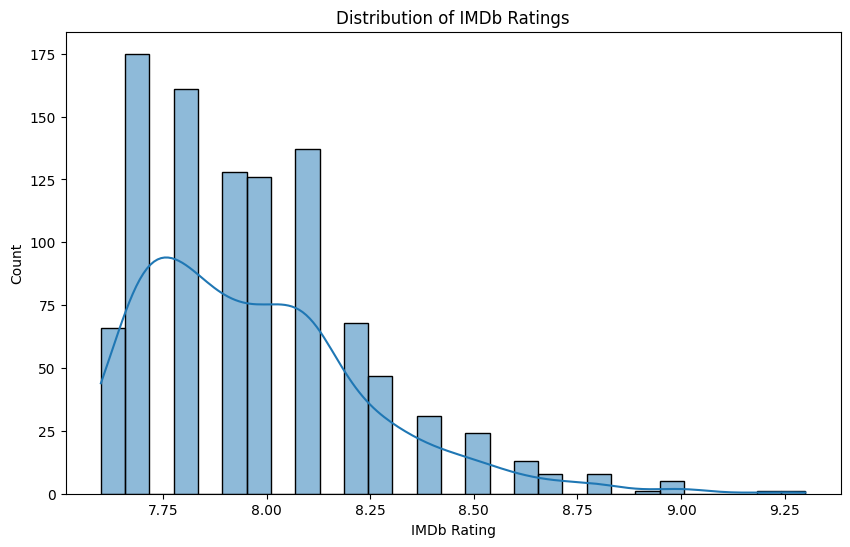

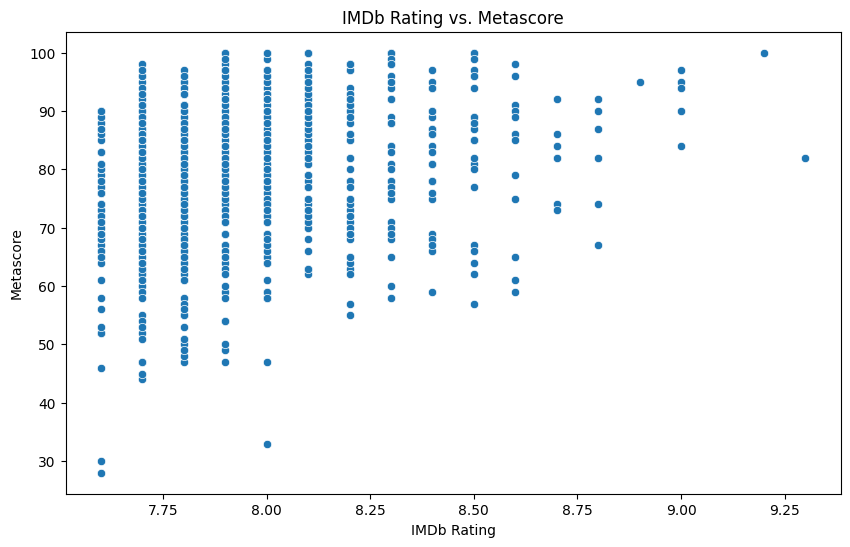

In [17]:
# Visualize the distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(imdb_top1000['IMDb Rating'], kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.show()

# Visualize the relationship between IMDb ratings and Metascores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDb Rating', y='Metascore', data=imdb_top1000)
plt.title('IMDb Rating vs. Metascore')
plt.show()

## Visualizing IMDb Ratings and IMDb Rating vs. Metascore

In this section, we use data visualization to gain insights into IMDb ratings and explore the relationship between IMDb ratings and Metascores.

### Distribution of IMDb Ratings

In the first visualization, we create a histogram to illustrate the distribution of IMDb ratings in the IMDb top 1000 movies dataset. The `sns.histplot` function is used to generate the histogram, and the `kde=True` parameter adds a Kernel Density Estimation curve to the plot. The histogram provides a visual representation of how IMDb ratings are distributed across the dataset, giving an overview of the rating range and frequency.<br>
**Insights** : From the graph we can see that the maximum of the ratings lie between 7-8 Imdb, this is because these are the top 1000 movies hence we don't get the least rated movies in the graph

### IMDb Rating vs. Metascore

In the second visualization, we examine the relationship between IMDb ratings and Metascores. This scatter plot shows how IMDb ratings correspond to Metascores for the movies. Each point in the plot represents a movie, with IMDb ratings on the x-axis and Metascores on the y-axis. This visualization allows us to explore whether there is a correlation or pattern between the two rating systems. <br>
**Insights** :We observe that metascore are not highly dependable on the imdb, as there is a huge difference between them, but highly rated imdb movies don't have much variance, may be bacause the no. of such movies are low.

Both visualizations are created using the `seaborn` library, and appropriate titles are added to provide context to the plots.

Visualizations like these can be invaluable for understanding the distribution and relationships within your dataset, helping you identify patterns and insights that may not be immediately apparent from the raw data.

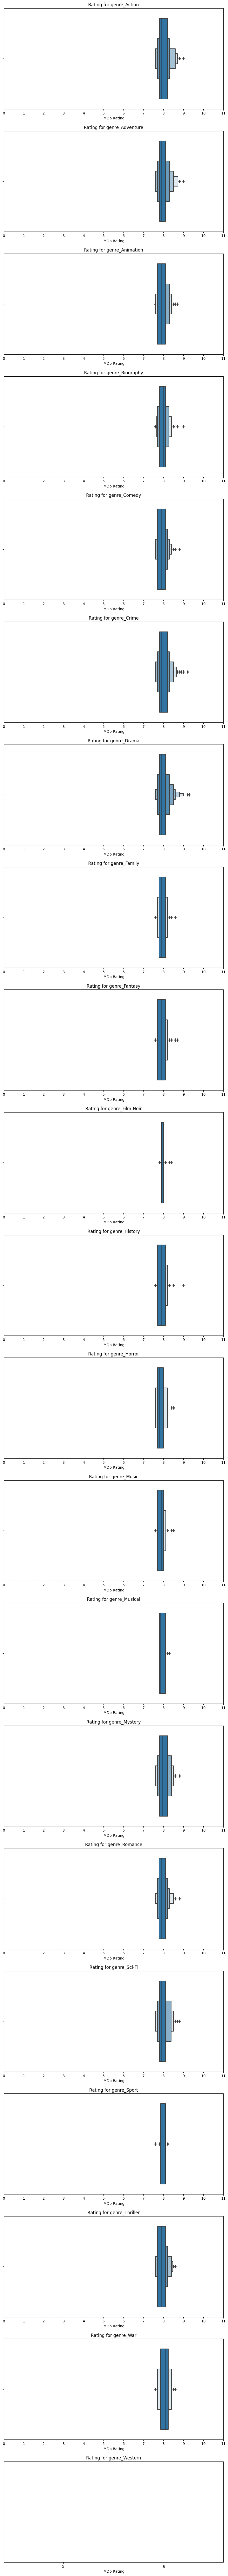

In [18]:
#let's filter the columns with 'genre' present in it using lambda and filter options
genreCols = list(filter(lambda c: 'genre' in c, imdbtop1000_result.columns))
#let's define a figure with number of subplots this number is define by the length of the genreCols variable
fig, ax = plt.subplots(nrows=len(genreCols), ncols=1, figsize=(10,100))
# let's define a consistent amount of space between each subplot
fig.tight_layout(pad=4.0)
#set the scaling between the axis equal
plt.axis('equal')
# Now we will use the for loop to plot all the columns boxplot
for idx, col in enumerate(genreCols):
    sns.boxenplot(data=imdbtop1000_result[imdbtop1000_result[col].isin([1])], x='IMDb Rating', ax=ax[idx])
    ax[idx].set(title=f"Rating for {col}")
    ax[idx].set_xticks(range(0,12))

plt.show()

## Visualizing IMDb Ratings by Genre

In this section, we create multiple boxen plots to visualize IMDb ratings for different movie genres. The objective is to explore how IMDb ratings vary across various genres of movies.

### Understanding the Code

The code provided utilizes `seaborn` and `matplotlib` to create a series of boxen plots. Here's a breakdown of the code:

1. **Filtering Columns**: First, we use the `filter` function to identify and list the columns in the dataset that contain the term 'genre.' These columns represent different movie genres in one-hot encoded format. The list of genre-related columns is stored in the variable `genreCols`.

2. **Defining Subplots**: We define a figure (`fig`) with a number of subplots equal to the length of `genreCols`. This ensures that there is a dedicated subplot for each genre. The `fig.tight_layout` function adds consistent spacing between subplots.

3. **Scaling and Axis**: We set the scaling between the axes equal to maintain consistent proportions. This helps ensure that the subplots are displayed clearly.

4. **Looping Through Genres**: A for loop is used to iterate through each genre column. For each genre, a boxen plot is created using the `sns.boxenplot` function. This type of plot is ideal for visualizing the distribution of IMDb ratings for different genres.

5. **Titles and Ticks**: Titles for each subplot are set to describe the genre it represents. Additionally, we define the x-axis ticks to range from 0 to 12, as IMDb ratings typically fall within this range.

6. **Displaying the Plots**: The `plt.show()` function is called to display the collection of boxen plots.

This code allows us to see how IMDb ratings are distributed across different movie genres, making it easier to compare and analyze the ratings within each genre.


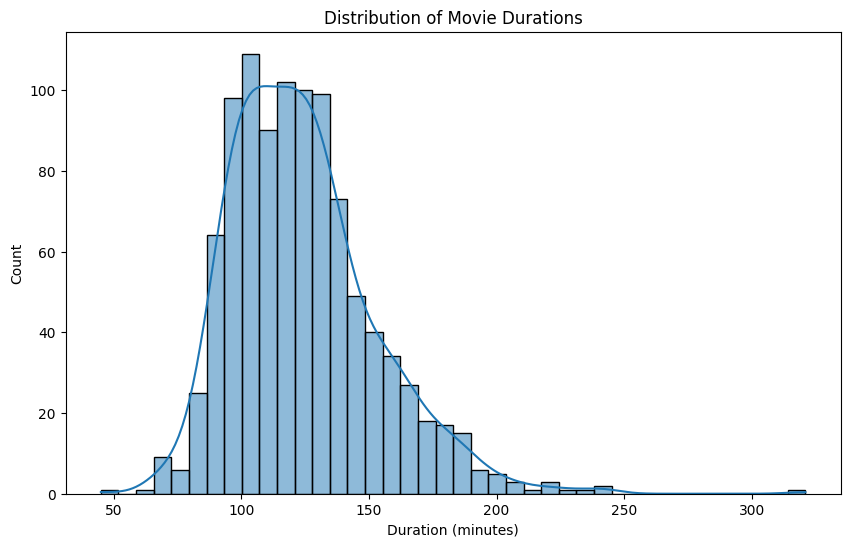

In [19]:
# Visualize the distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(imdb_top1000['Duration'], kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

## Visualizing Movie Durations

In this section, we create a histogram to visualize the distribution of movie durations. The goal is to understand the typical duration of movies within the IMDb top 1000 list.

### Understanding the Code

The provided code utilizes the `seaborn` and `matplotlib` libraries to create a histogram. Here's a breakdown of the code:

1. **Plotting Duration Distribution**: We start by creating a figure (`plt.figure()`) with a specific size (`figsize`) to define the dimensions of the plot.

2. **Histogram with KDE**: We use `sns.histplot` to create a histogram of movie durations. The `kde=True` parameter adds a Kernel Density Estimate (KDE) line to visualize the probability density of the duration values.

3. **Setting Title and Labels**: We set the title of the plot using `plt.title`, which describes the purpose of the visualization. The x-axis label is defined with `plt.xlabel` to indicate that the values represent movie durations in minutes.

4. **Displaying the Plot**: The `plt.show()` function is called to display the histogram and KDE.

This code enables us to explore the distribution of movie durations within the IMDb top 1000 list, helping us identify common duration ranges and understand the overall spread of movie lengths.


**Insights** : We can see that maximum of the movies have count between 100 to 150 min

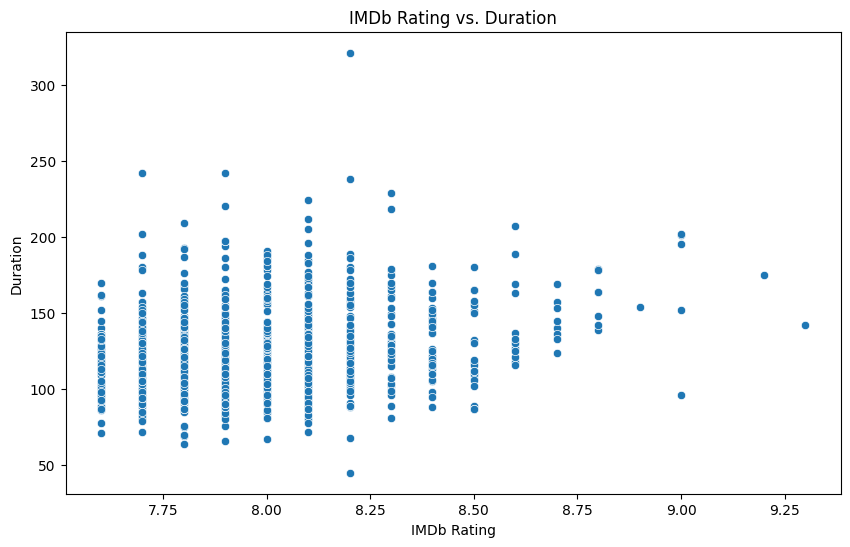

In [20]:
# Visualize the relationship between IMDb ratings and Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDb Rating', y='Duration', data=imdb_top1000)
plt.title('IMDb Rating vs. Duration')
plt.show()

## Visualizing IMDb Rating vs. Duration

In this section, we create a scatterplot to visualize the relationship between IMDb ratings and the duration of movies in the IMDb Top 1000 dataset. This plot helps us understand whether there is any correlation or pattern between a movie's IMDb rating and its length in minutes.

### Understanding the Code

The code uses the `seaborn` library to create a scatterplot:

1. **Setting Figure Size**: We define the figure's size using `plt.figure(figsize=(10, 6))` to ensure a clear and appropriately sized plot.

2. **Creating the Scatterplot**: We use `sns.scatterplot` to create the scatterplot. The `x` and `y` parameters specify the variables to be plotted on the x and y axes, respectively. In this case, we are plotting 'IMDb Rating' on the x-axis and 'Duration' on the y-axis.

3. **Setting the Title**: The `plt.title` function is used to set a title for the plot, describing its purpose.

This scatterplot allows us to visually explore any relationship between movie duration and IMDb ratings. By analyzing the distribution of points, we can gain insights into whether there is a correlation or pattern between these two attributes.


**Insights** : We can observe  Outliers in the data, but most of the movies are under 250 minutes which have a high rating.

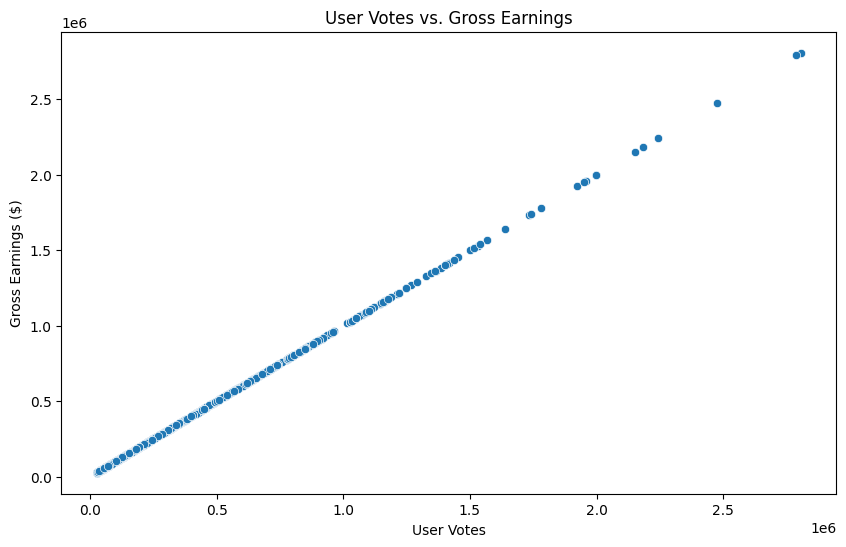

In [21]:
# Visualize the relationship between user votes and gross earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Grossed in $', data=imdb_top1000)
plt.title('User Votes vs. Gross Earnings')
plt.xlabel('User Votes')
plt.ylabel('Gross Earnings ($)')
plt.show()


## Visualizing User Votes vs. Gross Earnings

In this section, we create a scatterplot to visualize the relationship between user votes and gross earnings of movies in the IMDb Top 1000 dataset. The primary goal is to understand how the number of user votes correlates with a movie's gross earnings.

### Understanding the Code

The code uses the `seaborn` library to create a scatterplot:

1. **Setting Figure Size**: We define the figure's size using `plt.figure(figsize=(10, 6))` to ensure a clear and appropriately sized plot.

2. **Creating the Scatterplot**: We use `sns.scatterplot` to create the scatterplot. The `x` and `y` parameters specify the variables to be plotted on the x and y axes, respectively. In this case, we are plotting 'Votes' (user votes) on the x-axis and 'Grossed in $' (gross earnings) on the y-axis.

3. **Setting Title, Labels**: We set a title for the plot using `plt.title`. We also label the x and y axes to clarify what each axis represents.

### Insights

The scatterplot shows the relationship between user votes and gross earnings of movies in the IMDb Top 1000 dataset. When examining the plot, several insights can be drawn:

1. **Strong Positive Correlation**: The scatterplot exhibits a strong positive correlation between user votes and gross earnings. As the number of user votes increases, there is a corresponding increase in gross earnings. This suggests that more popular movies with a higher number of user votes tend to earn more at the box office.

2. **Outliers**: While the majority of data points follow the general trend of positive correlation, there are outliers. These outliers represent movies that received a significant number of user votes but may not have earned as much gross revenue as expected. These outliers can be explored further to understand the underlying factors contributing to this behavior.

3. **Straight Line Pattern**: It's worth noting that the plot forms a nearly straight line, indicating a linear relationship between user votes and gross earnings. This linear pattern suggests that for every increase in user votes, there is a consistent increase in gross earnings.

Understanding this relationship between user votes and gross earnings is valuable for filmmakers, studios, and investors. It highlights the importance of engaging with the audience and building a strong fan base to drive both critical acclaim and financial success for a movie.


In [22]:
# Identify the top-rated movies
top_rated_movies = imdb_top1000.sort_values(by='IMDb Rating', ascending=False).head(10)
top_rated_movies

,Movie Name,Certificate,Duration,Genre,IMDb Rating,Metascore,Director,Stars,Votes,Grossed in $,Plot
0,The Shawshank Redemption,R,142,|Drama|,9.3,82.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2807416,2807416.0,"Over the course of several years, two convicts..."
1,The Godfather,R,175,|Crime|Drama|,9.2,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1956381,1956381.0,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,PG-13,152,|Action|Crime|Drama|,9.0,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2789160,2789160.0,When the menace known as the Joker wreaks havo...
3,Schindler's List,R,195,|Biography|Drama|History|,9.0,95.0,Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",1411332,1411332.0,"In German-occupied Poland during World War II,..."
4,The Lord of the Rings: The Return of the King,PG-13,201,|Action|Adventure|Drama|,9.0,94.0,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1921772,1921772.0,Gandalf and Aragorn lead the World of Men agai...
5,12 Angry Men,Approved,96,|Crime|Drama|,9.0,97.0,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",835538,835538.0,The jury in a New York City murder trial is fr...
6,The Godfather Part II,R,202,|Crime|Drama|,9.0,90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1328486,1328486.0,The early life and career of Vito Corleone in ...
7,Pulp Fiction,R,154,|Crime|Drama|,8.9,95.0,Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",2153060,2153060.0,"The lives of two mob hitmen, a boxer, a gangst..."
12,The Lord of the Rings: The Two Towers,PG-13,179,|Action|Adventure|Drama|,8.8,87.0,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",1734147,1734147.0,While Frodo and Sam edge closer to Mordor with...
14,Jai Bhim,TV-MA,164,|Crime|Drama|Mystery|,8.8,NaN,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan K., Rajisha ...",211008,211008.0,When a tribal man is arrested for a case of al...


## Identifying the Top-Rated Movies

In this section, we are sorting and selecting the top-rated movies from the IMDb Top 1000 dataset based on their IMDb ratings. The code identifies the top 10 movies with the highest IMDb ratings.

### Understanding the Code

The code uses the following steps to identify the top-rated movies:

1. **Sorting the DataFrame**: We use the `sort_values` function to sort the `imdb_top1000` DataFrame by the 'IMDb Rating' column in descending order. This means that the movies with the highest IMDb ratings will appear at the top.

2. **Selecting the Top Movies**: We use the `head(10)` function to select the top 10 movies from the sorted DataFrame. These are the movies with the highest IMDb ratings.

### Insights

The resulting DataFrame, `top_rated_movies`, contains information about the top 10 movies with the highest IMDb ratings in the IMDb Top 1000 dataset. These movies are considered the best-rated movies based on user ratings and reviews.

Filmmakers, critics, and movie enthusiasts often value these highly rated movies for their exceptional storytelling, performances, and overall cinematic quality. They serve as a great reference for those looking for outstanding films to watch or analyze.

Analyzing the top-rated movies can provide valuable insights into the qualities and elements that contribute to a movie's critical and audience acclaim.


In [23]:
# Director with the most movies in the top 1000
top_director = imdb_top1000['Director'].value_counts().idxmax()

# Actor with the most appearances in the top 1000
top_actor = imdb_top1000['Stars'].str.split(', ').explode().value_counts().idxmax()
print("top direcor:",top_director)
print("top actor:",top_actor)

top direcor: Alfred Hitchcock
top actor: Robert De Niro


## Identifying the Top Director and Actor

In this section, we aim to find the director with the most movies in the IMDb Top 1000 dataset and the actor with the most appearances in these movies. The code identifies these individuals and displays the results.

### Understanding the Code

The code uses the following steps to identify the top director and actor:

1. **Director with the Most Movies**: We use the `value_counts()` function to count the number of movies directed by each unique director in the 'Director' column. Then, `idxmax()` is used to find the director with the most movies.

2. **Actor with the Most Appearances**: We first split the 'Stars' column, which contains lists of actors for each movie, into individual actors using the `str.split(', ')` function. We then use `explode()` to create a separate row for each actor in the resulting lists. Finally, `value_counts()` and `idxmax()` are used to find the actor with the most appearances in the top 1000 movies.

### Insights

1. **Top Director**: The director with the most movies in the IMDb Top 1000 is **Alfred Hitchcock**. Alfred Hitchcock is known for his influential and iconic contributions to the world of cinema. He is celebrated for his mastery of suspense and directing classic films, making him a prominent figure in film history.

2. **Top Actor**: The actor with the most appearances in the IMDb Top 1000 is **Robert De Niro**. Robert De Niro is a highly acclaimed actor known for his versatile roles and exceptional performances in a wide range of films. He has left a significant impact on the film industry and is recognized as one of the greatest actors of his generation.

These findings provide insights into the significant contributions of Alfred Hitchcock and Robert De Niro to the world of cinema. It highlights their enduring influence and the enduring appeal of their work among both audiences and film enthusiasts.


# Conclusion

In this project, we successfully conducted web scraping to collect data from IMDb's Top 1000 movies. The project's primary objective was to extract essential details about these movies, conduct thorough exploratory data analysis (EDA), and uncover valuable insights from the dataset. The following key aspects were addressed throughout the project:

## Data Collection and Preparation

The initial phase involved web scraping, leveraging Python libraries like Requests and BeautifulSoup. We efficiently obtained comprehensive information about the top 1000 movies, encompassing movie titles, certificates, durations, genres, IMDb ratings, metascores, directors, star casts, votes, gross earnings, and plot summaries. The data was systematically structured to facilitate analysis.

Data collection presented several challenges, such as scraping multiple pages from IMDb, dealing with missing or inconsistent data, and converting data types to ensure its suitability for analysis.

## Exploratory Data Analysis (EDA)

The EDA phase was dedicated to gaining insights into the dataset and understanding the characteristics of IMDb's Top 1000 movies. Key findings and analyses from this phase included:

1. **Data Overview**: The initial examination of the dataset allowed us to comprehend its structure and content, encompassing checks for missing values and data types.

2. **Genre and Stars**: Dummy columns were created for movie genres and actor names to facilitate more in-depth analysis. This enabled us to explore the distribution of genres and identify popular actors in the top movies.

3. **Distribution Analysis**: Visualizations were employed to investigate the distribution of IMDb ratings, movie durations, and the relationships between IMDb ratings and metascores. Furthermore, the association between user votes and gross earnings was explored.

4. **Top-Rated Movies**: We identified the top 10 movies in the IMDb Top 1000 based on their IMDb ratings. These movies represent the highest-rated films in the dataset.

5. **Top Director and Actor**: Alfred Hitchcock was recognized as the director with the most movies in the top 1000, while Robert De Niro emerged as the actor with the most appearances. These findings underscore the significance of these figures in the film industry.

## Project Insights

This project generated several valuable insights:

- The IMDb Top 1000 dataset encompasses a wide range of movie genres, underscoring the diverse preferences of movie enthusiasts.

- High IMDb ratings are distributed across various genres, demonstrating that outstanding films can be found in different categories.

- Movie durations exhibit substantial variation, with most movies falling within the 100 to 150-minute range.

- IMDb ratings do not consistently align with metascores, reflecting the distinct criteria employed by these two rating systems.

- Strong positive correlation between user votes and gross earnings indicates that movies with higher earnings tend to attract more user engagement.

- Alfred Hitchcock's extensive directorial contributions are evident in the dataset, as he directed the most movies in the top 1000.

- The frequent appearances of Robert De Niro underscore his status as one of the most prolific and acclaimed actors in the industry.

## Future Considerations

In future iterations of this project, further analyses and features could be explored, including sentiment analysis of plot summaries or the inclusion of data on release years to examine cinematic trends over time. Additionally, machine learning models may be applied for predictive or classification tasks related to movie success.

This project illuminates the possibilities of data scraping, exploratory data analysis, and the invaluable insights that can be derived from publicly accessible data sources. It emphasizes the enduring allure and cultural importance of movies, their genres, and the remarkable individuals who contribute to the world of cinema.

